In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Part 1 - Basic Analysis

In [136]:
# read in csv
df = pd.read_csv('mosquito_data_part_2.csv')
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [137]:
# get general overview of dataset, datatypes, and any issues that may be seen on the surface

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


#### Q1.1: Convert the `WNV Present` column into a binary column and create dummy variables from the `Trap type` column.

To properly process datasets through statistical methodologies and models, you first need to convert objects into numerical values to properly find mathematical relationships.

The first outlined step to perform this encoding is the conversion of the `WNV Present` column, which signifies if a given mosquito batch was found to be positive or negative for the West Nile Virus.

In [138]:
# converting column into a binary column (0 or 1)

df['WNV Present'] = np.where(df['WNV Present'] == 'negative', 0, 1)

In [139]:
# ensuring proper binary encoding through value_counts, which summarizes the count of records per column value

df['WNV Present'].value_counts()

0    14501
1     3994
Name: WNV Present, dtype: int64

For columns that have many distinct values, dummy variables can be used.

Since there are are more than two values in the column, and since there is not an inherent numeric ordering for the values, dummy variables create separate columns for unique value that is present in the original column.

Luckily, pandas as a built in function for this methodology: `.get_dummies()`

This function takes in the required argument, which is the dataframe column you'd like to produce dummy variables for. An optional argument is `drop_first`, which defaults to `False`. If signified as `True`, the first column of the dummy columns is removed. The logic behind this is that (1) less columns are added to the dataset and (2) if all retained dummy columns are false, it is safe to assume that the dropped column is true.

We'll keep all 4 `Trap type` columns included for now, but we will address this again further down the notebook.

In [140]:
# getting dummy variables for the Trap type column

pd.get_dummies(df['Trap type']) #, drop_first = True)

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


#### Q1.2: What is the average number of mosquitoes for each month? What trends do you notice?

Here, some of the same functions described in Part 1 of this assignment are again leveraged, such as `.groupby()`, `.mean()`, and `.plot()`.

<AxesSubplot:ylabel='Month'>

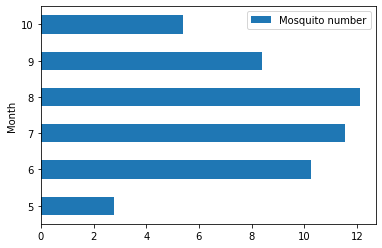

In [141]:
# select relevant subset of df, group the average number (mean) of mosquitos by month, plot it on a bar graph

df[['Month', 'Mosquito number']].groupby('Month').mean().plot(kind = 'barh')

As seen here and in the previous assignment, the average number of mosquitos captured grows as the weather becomes warmer, and therefore we see the highest average in July & August, with lower averages in Spring and Fall months

# Part 2 - Statistical Analysis
#### Q2.1: Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

To answer the above prompt, we'll first see how many mosquito species are part of the data set, and what the distribution of the species is.

In [142]:
df['Species'].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

When first running through this exercise, I went underwent a one-hot encoding methodology for `Species`, which maps a numeric value to a variable as the encoding mechanism.

However, as specified above with `Trap type`, this would be the incorrect path forward, as there is no ordinal logic associated with the mosquito species. I've included the commented-out code below.

In [143]:
# perform mapping
## df['Species'] = df['Species'].map({'CULEX RESTUANS': 1, 'CULEX PIPIENS': 2, 'CULEX TERRITANS': 3, 'CULEX SALINARIUS': 4})

# create separate series of all encoded Species & WNV test results
## all_cases = df[['Species', 'WNV Present']].groupby(['Species']).count()

# create separate series of all encoded Species that has a positive WNV test result
## positive_cases = df[['Species', 'WNV Present']].groupby(['Species']).sum()

# create separate dataframe for all encoded Species & WNV test results
## data = pd.DataFrame(df[['Species', 'WNV Present']].groupby(['Species']).sum())

# create new column in separate dataframe for all negative WNV test results
## data['WNV Not Present'] = all_cases - positive_cases

# run chi squared analysis
## stats.chi2_contingency(dummy_df)

In [144]:
# create new dummy dataframe of Species dummy variables
dummy_df = pd.get_dummies(df['Species'])

In [145]:
# add WNV Present column to dummy_df so that dependent variable is included in the dataset

dummy_df['WNV Present'] = df['WNV Present']
dummy_df

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,WNV Present
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
18490,1,0,0,0,1
18491,1,0,0,0,1
18492,0,1,0,0,1
18493,0,1,0,0,1


In [146]:
# vizualize dataframe, grouped by WNV Presence

dummy_df.groupby('WNV Present').sum()

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV Present,,,,
0,4074.0,9309.0,215.0,903.0
1,1412.0,2557.0,11.0,14.0


To see the correlations between mosquito species and positive WNV test results, we can call the pandas function `.corr()`, which provides the correlation relationship for each column in the dataframe specified.

In [147]:
# display correlations between column values

dummy_df.corr()

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS,WNV Present
CULEX PIPIENS,1.000000,-0.868829,-0.072228,-0.148322,0.065388
CULEX RESTUANS,-0.868829,1.000000,-0.148808,-0.305582,-0.001498
CULEX SALINARIUS,-0.072228,-0.148808,1.000000,-0.025404,-0.045215
CULEX TERRITANS,-0.148322,-0.305582,-0.025404,1.000000,-0.111394
WNV Present,0.065388,-0.001498,-0.045215,-0.111394,1.000000


When analyzing the bottom row or the right most column (both show the same findings), we see extremely weak correlations between `WNV Present` and each mosquito species.

To determine if there is any statistical significance, beyond the weak correlations seen above, we can use a form of hypothesis testing to quantify the p-value.

Within null hypothesis testing, the p-value signifies the probability of seeing test results at least as extreme as the results observed in the dataset. In other words, a p-value below 0.05 signifies that the probability of seeing the observed data would be rare if the null hypothesis were true, and therefore it is safe to reject the hypothesis.

For this particular case the null hypothesis would be the following:
* There is no statistical relationship between mosquito species when looking at the occurence of the West Nile Virus

There are a variety of statisical test that can be performed to determine the p-value between independent and dependent variables.

However, being that the prompt at hand inquires about the relationship between categorical variables, as opposed to continuous variables, the proper form of hypothesis testing is Chi Squared.

Within the SciPy stats package, there is a function for this methodology, denoted as `stats.chi2_contingency()`.

In [148]:
# perform chi squared hypothesis test

stats.chi2_contingency(dummy_df)

(72675.31966776465,
 0.9996628172537025,
 73976,
 array([[0.24394148, 0.52763573, 0.01004936, 0.04077549, 0.17759794],
        [0.24394148, 0.52763573, 0.01004936, 0.04077549, 0.17759794],
        [0.24394148, 0.52763573, 0.01004936, 0.04077549, 0.17759794],
        ...,
        [0.48788297, 1.05527147, 0.02009871, 0.08155098, 0.35519587],
        [0.48788297, 1.05527147, 0.02009871, 0.08155098, 0.35519587],
        [0.48788297, 1.05527147, 0.02009871, 0.08155098, 0.35519587]]))

The relevant number to us is the second number returned, `0.9996628...`, which is the p-value of the observed dataset.

Since 0.999 is greater than the null hypothesis rejection threshold of < 0.05, the null hypothesis can be retained. In fact, since the p-value is so close to 1, it proves that the observed relationship within the dataset almost exactly equals the null hypothesis.

#### Q2.2: Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

Although we did thorough data cleansing and EDA in Part 1 of this assignment, there are some additional data transformations needed to move forward with this and following prompts.

As seen and mentioned above, each variable to be included in any statistical analysis or model needs to be in numeric form. Therefore, we need to transform all `objects` into integers, floats, or other numeric formats.

In [149]:
# another overview of the dataset, specifically focused on dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  int64  
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


The following columns need to be either dropped or transformed into numerical values:
* Address Block
* Trap
* Trap type
* Date
* Species

Since we've addressed `Trap type` and `Species` in previous, separate analyses, we'll save those for later in the analysis.


Let's first look at `Date`. It is currently being displayed in a datetime format (although stored as an object), it is very granular and most likely does not provide additional insight that `Week`, `Month`, and `Year` columns already have. Therefore, we will drop date from the dataframe.

In [150]:
# dropping date using .drop()

df = df.drop('Date', axis = 1)

Next, we'll look at `Trap`. It is an interesting column, mostly due to the fact that outside of standardized preceding--and in some cases proceding--alphabetical letters, it is already an enumerated column. As opposed to creating 190 separate columns, which would make this dataset complex and harder to manage, let's see if we can leverage its current identifiers.

In [151]:
# gauge number of unique values

df['Trap'].nunique()

190

In [152]:
# display preview of standardized Trap ID format

df['Trap'].value_counts()

T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T128A      1
T135B      1
T241       1
T167       1
T040       1
Name: Trap, Length: 190, dtype: int64

Based on the Trap ID values that are shown, we see that each Trap begins with the letter T and that some satellite Traps end in an alphabetical character.

Since it seems that the three middle characters are always numbers, we'll create a for loop to extract those characters from the string, convert to numerical, and then replace the original Trap ID with the numerical extraction.

In [153]:
y = []

for x in range(len(df['Trap'])):
    y.append(df['Trap'][x][1:4])

In [154]:
df['Trap'] = y

In [155]:
df['Trap'] = df['Trap'].astype(dtype = 'int64')

ValueError: invalid literal for int() with base 10: '20A'

However, we run into an issue of a Trap ID containing an alphanumerical character. Let's take a deeper look.

In [156]:
# remove limit on number of rows displayed

pd.set_option("display.max_rows", None)

# find all unqiue new Trap values

df['Trap'].value_counts()

002    418
138    369
114    349
030    335
054    335
031    333
008    326
151    303
135    302
913    302
115    299
128    284
159    284
011    282
028    278
912    272
090    261
066    261
221    259
212    257
009    253
046    250
074    249
048    245
225    237
209    234
065    230
094    229
073    226
063    224
012    219
233    216
235    216
082    212
003    211
102    209
223    209
061    209
027    206
147    205
905    203
080    199
902    198
152    194
013    194
095    182
047    180
916    180
220    178
033    178
230    177
062    173
228    170
226    170
155    169
035    160
039    160
900    159
069    158
227    156
906    155
222    151
079    149
231    148
049    144
089    138
083    136
099    134
236    134
903    129
017    126
224    124
068    122
158    113
901    108
200    106
018     89
218     81
043     80
160     78
904     76
915     71
240     71
910     70
077     70
144     70
918     68
016     64
148     64
925     59
232     56

It looks like only 1 new Trap ID is facing this issue. We'll import the original CSV into a separate dataframe to see if we can spot the extraction issue

In [157]:
# read in original CSV

test_trap_df = pd.read_csv('mosquito_data_part_2.csv')

# find all unique values in Trap

test_trap_df['Trap'].value_counts()

T002     406
T114     340
T031     333
T008     326
T138     304
T151     303
T913     302
T135     301
T115     299
T030     299
T159     284
T128     283
T011     282
T028     273
T912     272
T066     261
T221     259
T212     257
T009     251
T074     246
T048     245
T090     244
T225     237
T209     234
T073     226
T094     226
T012     219
T065     217
T063     217
T233     216
T235     216
T082     212
T003     211
T223     209
T061     209
T102     209
T027     206
T147     205
T046     205
T905     203
T080     199
T902     198
T152     194
T013     194
T095     182
T916     180
T047     180
T033     178
T220     178
T230     177
T062     173
T228     170
T226     170
T155     169
T039     160
T035     160
T900     159
T069     158
T227     156
T906     155
T222     151
T054B    150
T079     149
T231     148
T049     144
T089     138
T083     136
T099     134
T236     134
T903     129
T017     126
T224     124
T068     122
T158     113
T901     108
T200     101
T054A     98

In [158]:
# restore display limit to avoid browser issues

pd.set_option('display.max_rows', 20)

For whatever reason, this Trap ID is the only ID that does not have a T as the preceding alphabetical character in the value. We'll remediate this through replacement of the ID in our dataframe.

In [159]:
# filter dataframe for rows that have the problematic identifier and replace the value with the appropriate value

df['Trap'][df['Trap'] == '20A'] = '220'

/var/folders/lb/vxhdzz_128l9mjh0gmf_1d2c0000gq/T/ipykernel_6095/4155296787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trap'][df['Trap'] == '20A'] = '220'


Now that the replacement is done, we are able to convert the dtype object within `Trap` from object to int

In [160]:
# changing dtype using .astype()

df['Trap'] = df['Trap'].astype(dtype = 'int64')

In [161]:
# confirm change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  int64  
 4   Trap type        18495 non-null  object 
 5   Mosquito number  18495 non-null  int64  
 6   WNV Present      18495 non-null  int64  
 7   Species          18495 non-null  object 
 8   Lat              18495 non-null  float64
 9   Lon              18495 non-null  float64
 10  Month            18495 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1.6+ MB


The last object that has not been addressed in this exercise or the prompts above is `Address Block`

`Address Block` current has 154 unique values, which is would be a ton of columns added to the dataset via dummy variables, making the initial analysis complex. Now that we have encoded `Trap` which has only 10 more values. In addition, we already have `Lat`, and `Lon`, which provide insight into mosquito location in addition to `Trap`.

Since this can be considered as duplicate column information, we'll drop `Address Block` from the dataframe.

In [162]:
# remove Address Block from dataset

df = df.drop('Address Block', axis = 1)

In [163]:
# confirm change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Trap             18495 non-null  int64  
 3   Trap type        18495 non-null  object 
 4   Mosquito number  18495 non-null  int64  
 5   WNV Present      18495 non-null  int64  
 6   Species          18495 non-null  object 
 7   Lat              18495 non-null  float64
 8   Lon              18495 non-null  float64
 9   Month            18495 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.4+ MB


Now that the only objects that remain are `Trap type` and `Species`, and that we know they are fairly small in terms of unique values, we can create a separate dataframe that contains their dummy variables and the other numeric columns in the dataframe.

Luckily, the `pd.get_dummies()` package knows not to apply dummies to numerical dtypes, so applying the function to the existing dataframe will only be applied to the columns of interest.

In [164]:
# create separate dataframe of dummy and numeric variables

dummy_df = pd.get_dummies(df)

To view the correlations between all columns and `Mosquito number`, we can run the same `.corr()` function we've run previously. The segmentation between positive correlations and negative correlations are below.

In [165]:
# produce correlation matrix for analysis

dummy_df.corr()

,Year,Week,Trap,Mosquito number,WNV Present,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
Year,1.000000,-0.023283,0.102077,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.261514,0.155283,-0.011656,0.128327,-0.347588,0.343895,-0.066536,0.005373
Week,-0.023283,1.000000,-0.017556,-0.033900,0.174265,-0.002876,0.002967,0.948940,0.028723,-0.047021,-0.013587,0.043002,0.316788,-0.315605,-0.011918,0.036645
Trap,0.102077,-0.017556,1.000000,0.116507,0.103819,0.323703,-0.590902,-0.025334,-0.013569,0.031873,-0.000977,-0.037872,-0.022527,0.035888,0.031356,-0.047749
Mosquito number,0.129326,-0.033900,0.116507,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.094147,-0.138275,-0.005392,0.108575,0.014730,0.070999,-0.072859,-0.150962
WNV Present,0.153881,0.174265,0.103819,0.408034,1.000000,0.110175,-0.163967,0.161334,0.002740,-0.027359,-0.003859,0.047073,0.065388,-0.001498,-0.045215,-0.111394
Lat,0.093983,-0.002876,0.323703,0.096820,0.110175,1.000000,-0.749416,-0.011544,-0.068795,0.067916,0.001292,-0.017184,-0.052372,0.076660,-0.004388,-0.056925
Lon,-0.094628,0.002967,-0.590902,-0.151421,-0.163967,-0.749416,1.000000,0.010695,0.060961,-0.081628,-0.004017,0.055548,0.021916,-0.055278,-0.004243,0.078145
Month,-0.100847,0.948940,-0.025334,-0.040426,0.161334,-0.011544,0.010695,1.000000,0.070174,-0.078398,-0.011988,0.035333,0.330760,-0.327509,-0.010218,0.032683
Trap type_CDC,-0.261514,0.028723,-0.013569,0.094147,0.002740,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.001280,-0.018611,0.158779,-0.150160,0.038892,-0.022071
Trap type_GRAVID,0.155283,-0.047021,0.031873,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.035669,-0.518582,-0.109750,0.098497,-0.029333,0.028193


Positive Correlations:
* `Year`
* `Trap`
* `WNV Present`
* `Lat`
* `Trap type_CDC`
* `Trap type_Sentinel`
* `Species_CULEX PIPIENS`
* `Species_CULEX RESTUANS`

Negative Correlations:
* `Week`
* `Lon`
* `Month`
* `Trap type_GRAVID`
* `Trap type_OVI`
* `Species_CULEX SALINARIUS`
* `Species_CULEX TERRITANS`

However, to better visualize and understand the correlations between columns, we can leverage heatmaps using the `seaborn` python package.

This visualization can also help us address colinearity, which needs to be mitigated to produce an optimized model.

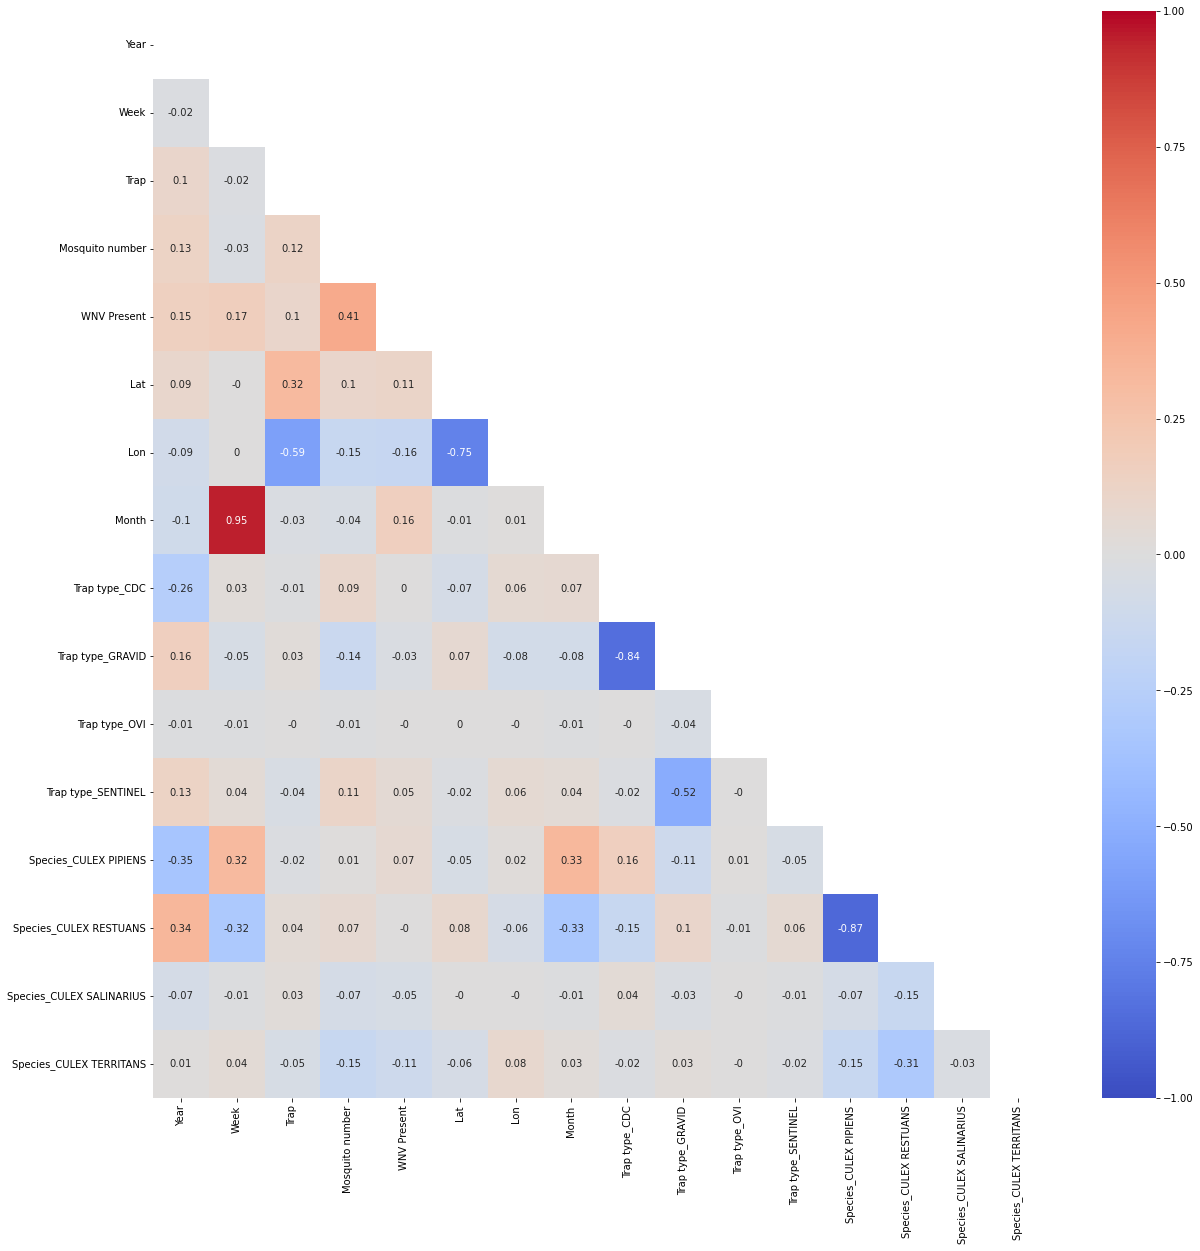

In [166]:
# create separate dataframe from dummy dataframe to create heatmap of correlation relationships
corr_df = dummy_df.corr()

# create a mask, which in this case cuts the matrix in half, diagonally, to remove duplicate information
mask = np.triu(corr_df)

# create visualization
## annot: to display column labels & corr numbers
## vmax/vmin: to set upper/lower bound of key
## center: to set center of key
## cmap: to set color theme
## mask: to apply triangular matrix, as specified above

plt.figure(figsize = (20,20))
sns.heatmap(corr_df.round(2), annot = True, vmax = 1, vmin= -1, center = 0, cmap = 'coolwarm', mask = mask)
plt.show()

As mentioned above, in addition to being a much better visualization aid, the heat map also provides clear problematic issues with colinearity across certain variables. We'll work through reducing the dataframe to mitigate this issues.

The first one we'll address is `Lat` and `Lon`. We see fairly strong negative correlations between the two columns. Since `Lon` is also problematic in conjunction with `Trap`, we'll drop `Lon` from the dataframe.

In [167]:
# remove 'Lon' using .drop()

dummy_df.drop('Lon', axis = 1, inplace = True)

Another issue is `Month` and `Week`, which see an extremely high positive correlation, nearing 1. It could go either way, but we'll remove `Week` for now and can swap later if need be.

In [168]:
# remove 'Lon' using .drop()

dummy_df.drop('Week', axis = 1, inplace = True)

Next are the dummy columns for `Species`, specifically between `Species_CULEX RESTUANS` and `Species_CULEX PIPIENS`. First, let's check out the break down between the columns.

In [169]:
# check distribution of species

dummy_df[['Species_CULEX RESTUANS', 'Species_CULEX PIPIENS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']].sum()

Species_CULEX RESTUANS      11866
Species_CULEX PIPIENS        5486
Species_CULEX SALINARIUS      226
Species_CULEX TERRITANS       917
dtype: int64

While not ideal in removing `Species_CULEX PIPIENS`, it is safe to remove it from the dataframe. As mentioned towards the beginning of the notebook, removing one of the dummy columns from the dummy variable creation is safe to do, since if all other columns are False, it is assumed that the removed column is True.

In [170]:
# remove culex pipiens species using .drop()

dummy_df.drop('Species_CULEX PIPIENS', axis = 1, inplace = True)

Last is the `Trap type` dummy columns. Again, let's first look at the breakdown of Trap types.

In [171]:
# check trap type distribution

dummy_df[['Trap type_CDC', 'Trap type_SENTINEL', 'Trap type_GRAVID', 'Trap type_OVI']].sum()

Trap type_CDC           544
Trap type_SENTINEL      209
Trap type_GRAVID      17741
Trap type_OVI             1
dtype: int64

The GRAVID trap has by far the most use, and therefore sees a negative strong negative correlation with other traps. Since OVI is used only once, and since SENTINEL has a relatively lower negative correlation with GRAVID, we'll drop CDC. This is safe to do since if a test does is not used by either GRAVID or SENTINEL, it has a 99% likelihood that it is a CDC trap.

In [172]:
# remove CDC and OVI trap types

dummy_df.drop('Trap type_CDC', axis = 1, inplace = True)
dummy_df.drop('Trap type_OVI', axis = 1, inplace = True)

Now that strong colinearity is removed from the dataset, we'll again visualize the heatmap

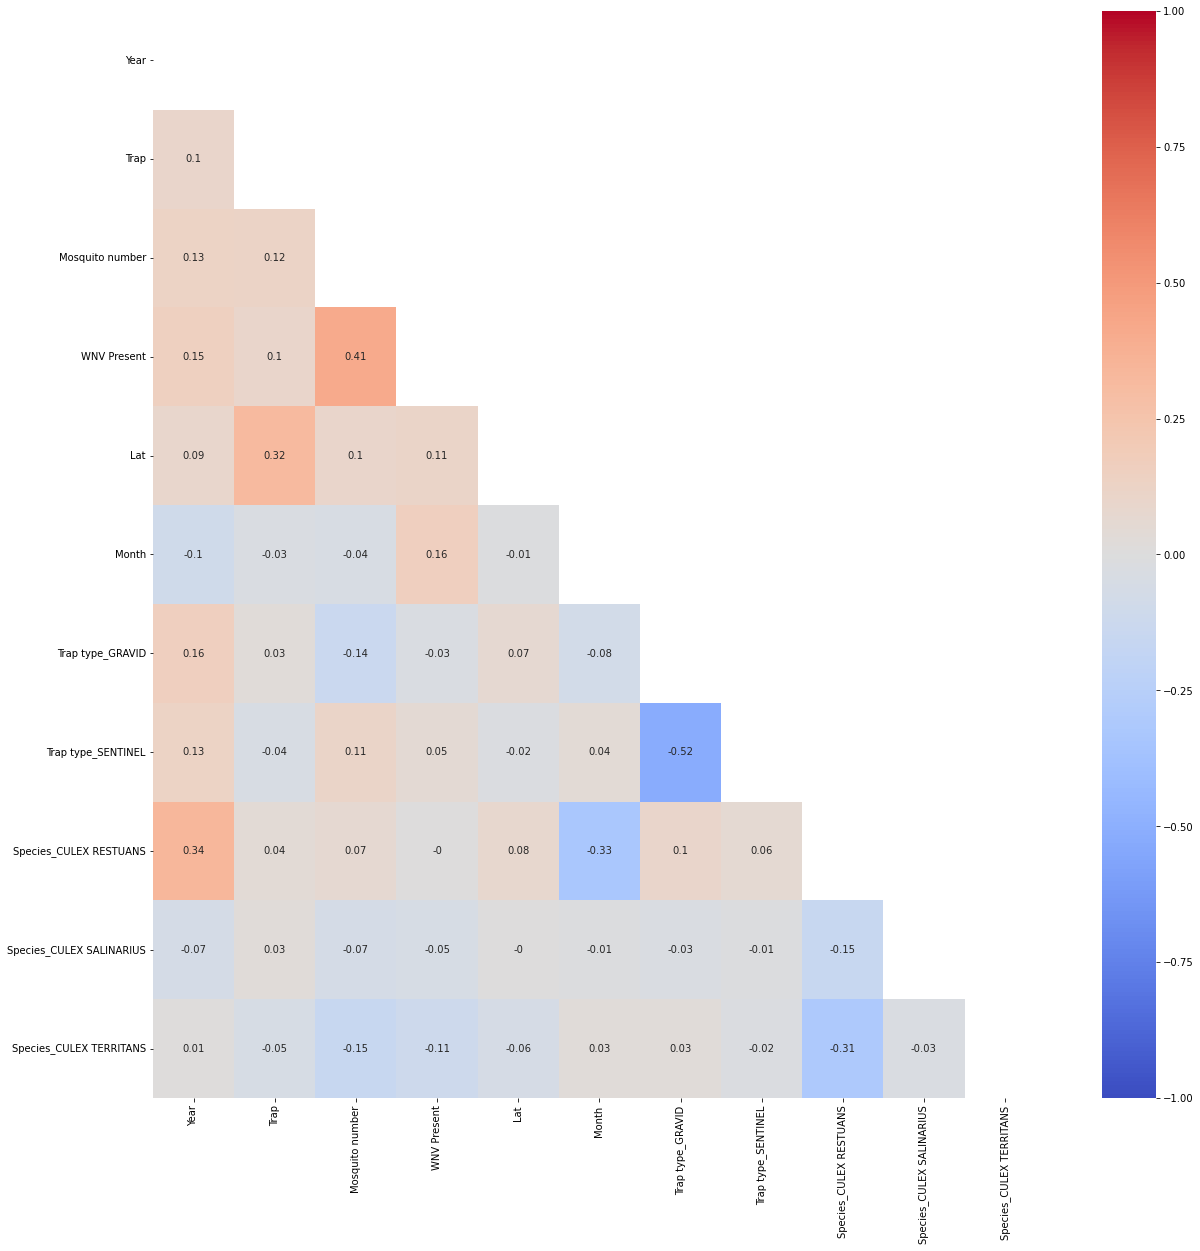

In [173]:
# same heatmap construction as above

corr_df = dummy_df.corr()

mask = np.triu(corr_df)

plt.figure(figsize = (20,20))
sns.heatmap(corr_df.round(2), annot = True, vmax = 1, vmin= -1, center = 0, cmap = 'coolwarm', mask = mask)
plt.show()

In [190]:
dummy_df.columns

Index(['Year', 'Trap', 'Mosquito number', 'WNV Present', 'Lat', 'Month',
       'Trap type_GRAVID', 'Trap type_SENTINEL', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS'],
      dtype='object')

In [196]:
# added this at the last minute since I thought I was onto something, but the p-values look off
# this is confirmed linear regression results, where Trap type_SENTINEL has a p-value of .114, but here is 1.28e-49
# however, the correlations are right on, so I'm unsure. Leaving it in here just for the feedback portion when it comes

for x in dummy_df:
    ind = dummy_df[x]
    dep = dummy_df['Mosquito number']
    pearson = stats.pearsonr(ind,dep)
    print(f'The correlation between {x} and the number of mosquitos is {pearson[0]} and the p-value is {pearson[1]}')

The correlation between Year and the number of mosquitos is 0.12932594549371043 and the p-value is 8.393050016377127e-70
The correlation between Trap and the number of mosquitos is 0.11650748044690704 and the p-value is 6.575277902585879e-57
The correlation between Mosquito number and the number of mosquitos is 1.0 and the p-value is 0.0
The correlation between WNV Present and the number of mosquitos is 0.40803439689029875 and the p-value is 0.0
The correlation between Lat and the number of mosquitos is 0.09681989674648905 and the p-value is 9.096861337562708e-40
The correlation between Month and the number of mosquitos is -0.04042643719660079 and the p-value is 3.8038755209747194e-08
The correlation between Trap type_GRAVID and the number of mosquitos is -0.13827479127699152 and the p-value is 1.2678161470314007e-79
The correlation between Trap type_SENTINEL and the number of mosquitos is 0.10857486046661548 and the p-value is 1.289396369617735e-49
The correlation between Species_CULE

## Part 3 - Advanced Statistical Analysis
1. Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
Note:

* You will likely see a low R^2 value, that is to be expected.
* This dataset does not respond well to performing VIF analysis, so this is not required.
* `WNV Present` must not be one of your independent variables.

In [174]:
# review dataframe after above changes

dummy_df.head()

,Year,Trap,Mosquito number,WNV Present,Lat,Month,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,910,2,0,41.977738,9,1,0,1,0,0
1,2019,114,1,0,41.798211,9,1,0,1,0,0
2,2019,28,2,0,41.987245,9,1,0,1,0,0
3,2019,228,1,0,41.953664,9,1,0,1,0,0
4,2019,209,9,0,41.657069,9,1,0,1,0,0


In [175]:
# use .columns function to retrieve array of column names

dummy_df.columns

Index(['Year', 'Trap', 'Mosquito number', 'WNV Present', 'Lat', 'Month',
       'Trap type_GRAVID', 'Trap type_SENTINEL', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS'],
      dtype='object')

In [176]:
# set x variables (independent)
# set y variable (dependent)

X = dummy_df[['Year', 'Trap', 'Lat', 'Month', 'Trap type_GRAVID', 'Trap type_SENTINEL', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']]
y = dummy_df['Mosquito number']

Now that the independent and dependent variables are defined, we first want to get a high level understanding of the relationships between each independent variable and the dependent variable. This helps us visualize the potential relationships and findings we may see once we run the linear regression model.

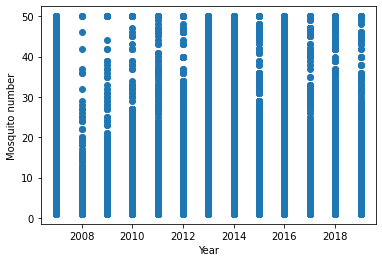

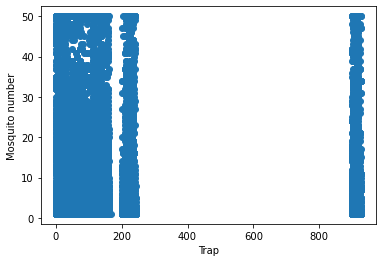

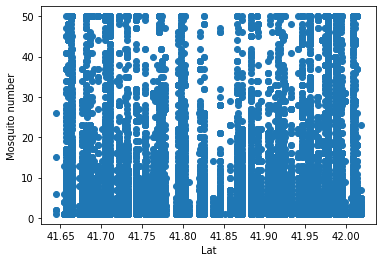

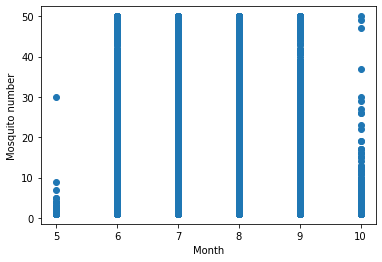

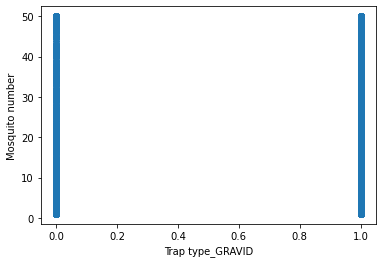

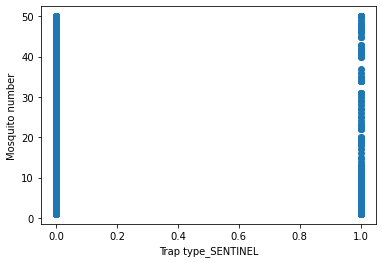

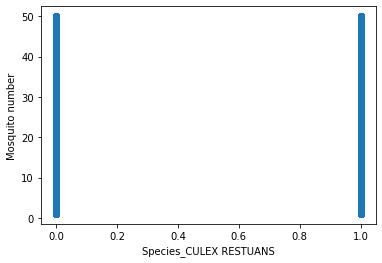

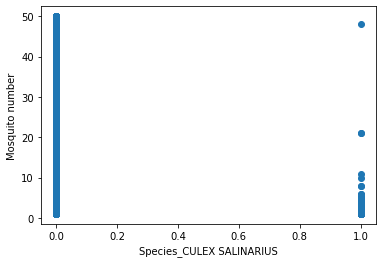

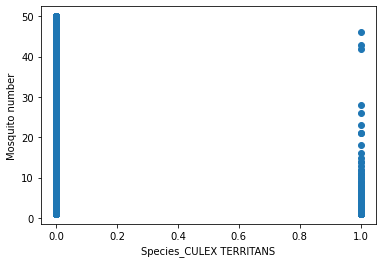

In [177]:
# perform high-level analysis to gauge linear relationships

for column in X.columns:
    plt.figure()
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Mosquito number')
    plt.show()

As seen in each visualization, there really aren't any linear relationships between the independent and dependent variables.

This is due to the fact that while we have successfully transformed our dataset to numerical values, the dataframe is largely categorical. In other words, the numbers represent discrete classifications, as opposed to continuous data points.

Linear regression models thrive when leveraging continuous data since those relationships can be correlated and projected on a future, temporal basis. However, when dealing with classification problems, a linear model is not fitting since there are no continuous data points, outside of the dependent variable, to base the causation and projection of future outcomes.

Having said that, let's continue through the Linear Regression model building.

In [178]:
# adding the constant

X_withconstant = sm.add_constant(X)

In [179]:
# Initiating the model using statsmodel
mos_num = sm.OLS(y, X_withconstant)

# Fit and run the model
mos_num_results = mos_num.fit()

# View the results
mos_num_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:56:41   Log-Likelihood:                -73520.
No. Observations:               18495   AIC:                         1.471e+05
Df Residuals:                   18485   BIC:                         1.471e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1323.3645     66.461    -19.912      0.000   -1453.635   -1193.094
Year                         0.5223      0.028     18.410      0.000       0.467       0.578
Trap                         0.0041      0.000     11.121      0.000       0.003       0.005
Lat                          7.1361      0.873      8.177      0.000       5.426       8.847
Month                       -0.6317      0.101     -6.237      0.000      -0.830      -0.433
Trap type_GRAVID           -10.7443      0.584    -18.408      0.000     -11.888      -9.600
Trap type_SENTINEL           1.7165      1.086      1.581      0.114      -0.412       3.845
Species_CULEX RESTUANS      -1.2962      0.239     -5.419      0.000      -1.765      -0.827
Species_CULEX SALINARIUS    -9.9809      0.878    -11.373      0.000     -11.701      -8.261
Species_CULEX TERRITANS     -9.5743      0.466    -20.537      0.000     -10.488      -8.660
==============================================================================
Omnibus:                     4558.580   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9044.048
Skew:                           1.512   Prob(JB):                         0.00
Kurtosis:                       4.609   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The main takeaway of the above results is the statistical insignificance of the Sentinel Trap type. Before removing it from the model, lets try to interpret the model results.

The coefficients shown represent the relative increase or decrease in the number of mosquitos with a one unit increase in the independent variable. For example:

* With 1 unit increase in Year, there is a 0.5223 increase in the number of mosquitos trapped, indicating a rising number of mosquitos in the area (or simply more effective trapping mechanisms)
* With 1 unit increase in Trap, there is a 0.0041 increase in the number of mosquitos trapped, indicating a near-negligible effect on the dependent variable.
* However, interestingly enough, with 1 unit increase in Lat, there is a 7.1361 increase in the number of mosquitos trapped, which substaintial, especially considering the small effect Trap number had.

As expected, the model performs poorly. This is mainly due to the point above regarding the fact that this dataset is better suited towards a classification problem, has opposed to forecasting problem.

However, let's remove the Sentinel Trap to see if we garner better results.

In [180]:
X = dummy_df[['Year', 'Trap', 'Lat', 'Month', 'Trap type_GRAVID', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']]
y = dummy_df['Mosquito number']

In [181]:
X_withconstant = sm.add_constant(X)

In [182]:
# Initiating the model using statsmodel
mos_num = sm.OLS(y, X_withconstant)

# Fit and run the model
mos_num_results = mos_num.fit()

# View the results
mos_num_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:56:43   Log-Likelihood:                -73521.
No. Observations:               18495   AIC:                         1.471e+05
Df Residuals:                   18486   BIC:                         1.471e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1343.5079     65.231    -20.596      0.000   -1471.367   -1215.649
Year                         0.5321      0.028     19.220      0.000       0.478       0.586
Trap                         0.0041      0.000     11.053      0.000       0.003       0.005
Lat                          7.1565      0.873      8.201      0.000       5.446       8.867
Month                       -0.6264      0.101     -6.188      0.000      -0.825      -0.428
Trap type_GRAVID           -11.2515      0.488    -23.074      0.000     -12.207     -10.296
Species_CULEX RESTUANS      -1.2752      0.239     -5.339      0.000      -1.743      -0.807
Species_CULEX SALINARIUS    -9.9805      0.878    -11.372      0.000     -11.701      -8.260
Species_CULEX TERRITANS     -9.5645      0.466    -20.517      0.000     -10.478      -8.651
==============================================================================
Omnibus:                     4546.974   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9003.011
Skew:                           1.510   Prob(JB):                         0.00
Kurtosis:                       4.601   Cond. No.                     1.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unfortunately, no discernable changes once Sentinel trap type is removed.

Since we've already seen in the pre-model fitting process that Linear Regression was not the ideal model methodology for this dataset, lets take a look at Logistic Regression.

#### Q3.2: Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
Note: `Mosquito number` should be one of your independent variables.

In [183]:
# define independent variables
X = dummy_df[['Year', 'Trap', 'Mosquito number', 'Lat', 'Month', 'Trap type_GRAVID', 'Trap type_SENTINEL', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']]
# define dependent variable
y = dummy_df['WNV Present']

# add constant
X_withconstant = sm.add_constant(X)

In [184]:
# initiate model
wnv_logreg = sm.Logit(y, X_withconstant)

# fit model
wmv_logreg_results = wnv_logreg.fit()

# run model and see summary results
wmv_logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.408964
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2161
Time:                        20:56:45   Log-Likelihood:                -7563.8
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -307.4805     15.687    -19.601      0.000    -338.227    -276.734
Year                         0.1213      0.007     18.079      0.000       0.108       0.134
Trap                         0.0003   7.23e-05      4.606      0.000       0.000       0.000
Mosquito number              0.0656      0.001     45.368      0.000       0.063       0.068
Lat                          1.3407      0.195      6.892      0.000       0.959       1.722
Month                        0.6235      0.024     25.764      0.000       0.576       0.671
Trap type_GRAVID             0.2607      0.132      1.981      0.048       0.003       0.519
Trap type_SENTINEL          -0.2619      0.215     -1.217      0.224      -0.684       0.160
Species_CULEX RESTUANS      -0.2938      0.051     -5.773      0.000      -0.393      -0.194
Species_CULEX SALINARIUS    -0.9997      0.322     -3.100      0.002      -1.632      -0.368
Species_CULEX TERRITANS     -2.5412      0.274     -9.265      0.000      -3.079      -2.004
============================================================================================
"""

In [185]:
# initiative predictive function of model using .predict and defined add_constant
y_proba = wmv_logreg_results.predict(X_withconstant)

# round results over .5 to 1, since logistic regression probabilities are based binaries
y_pred = np.where(y_proba >= 0.5, 1, 0)

# where WNV present result equals prediction, consider prediction correct and sum
num_correct = (y_pred == y).sum()

# divide number correct by total number of records to find prediction accuracy
pct_accuracy = num_correct / X.shape[0]

# display prediction accuracy
np.round(pct_accuracy * 100, 3)

81.292

At a model accuracy of 81.292%, we assume that we can predict with that accuracy whether or not a given test batch will be WNV positive or not. 

Although the Sentinel Trap Type has a relatively higher p-value, and is technically statistically insignificant, it is an important business question of the type of traps that should be used as the WNV testing process is scaled and/or optimized, so we will keep it for now.

To better visualize the importance of the features that go into a given prediction, we'll graphically depict the coefficients below.

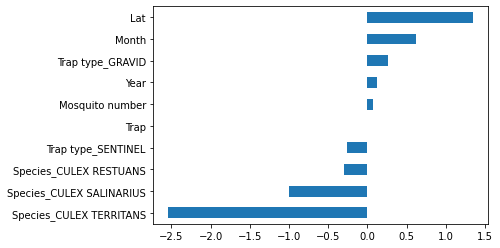

In [186]:
#grab features
parameters = wmv_logreg_results.params
#drop constant
parameters.drop('const', inplace = True)

#plot features by coefficient values
plt.figure()
parameters.sort_values().plot(kind="barh")
plt.show()

Here, we see that Latitude and Month are the two largest contributors towards the model's prediction.

However, let's see how we can leverage the correlation numbers seen previously to achieve similar accuracy with less features.

In [187]:
# find correlation numbers

dummy_df.corr()['WNV Present'].sort_values(ascending = False)

WNV Present                 1.000000
Mosquito number             0.408034
Month                       0.161334
Year                        0.153881
Lat                         0.110175
Trap                        0.103819
Trap type_SENTINEL          0.047073
Species_CULEX RESTUANS     -0.001498
Trap type_GRAVID           -0.027359
Species_CULEX SALINARIUS   -0.045215
Species_CULEX TERRITANS    -0.111394
Name: WNV Present, dtype: float64

In [188]:
# perform same logistic regression set-up as seen above
X_2 = X['Mosquito number']
X_2_cons = sm.add_constant(X_2)

forw_select = sm.Logit(y, X_2_cons)

forw_select_fit = forw_select.fit()

forw_select_fit.summary()

Optimization terminated successfully.
         Current function value: 0.449355
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18493
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1387
Time:                        20:56:49   Log-Likelihood:                -8310.8
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1471      0.028    -77.765      0.000      -2.201      -2.093
Mosquito number     0.0637      0.001     48.970      0.000       0.061       0.066
===================================================================================
"""

In [189]:
# initiative predictive function of model using .predict and defined add_constant
y_proba = forw_select_fit.predict(X_2_cons)

# round results over .5 to 1, since logistic regression probabilities are based binaries
y_pred = np.where(y_proba >= 0.5, 1, 0)

# where WNV present result equals prediction, consider prediction correct and sum
num_correct = (y_pred == y).sum()

# divide number correct by total number of records to find prediction accuracy
pct_accuracy = num_correct / X.shape[0]

# display prediction accuracy
np.round(pct_accuracy * 100, 3)

79.205

Compared to the 81% accuracy we saw with many features, we see a 79% accuracy with only one.

Intuitively, it makes sense that the larger number of mosquitos trapped and tested, the higher the likelihood that a mosquito in the batch will test positive.

# Summary

In this notebook, we performed the following:
* Performed data transformations and encodings for statisical analysis, such as binarization and dummy variables
* Found trends and relationships between number of mosquitos by month
* Performed hypothesis testing via Chi Squares to determine statistical significance between categorical variables
* Performed multi-variable correlation analysis and statistical significance of correlations
* Explored colinearity, and how to mitigate said relationships when building models
* Built Linear Regression models and determined how data types influence model selection
* Build Logistic Regression models, how to perform model accuracy measurement, and how leveraging forward selection via correlation can supplement model development